## Tutorial 3: Machine Learning and Programming in Python

This tutorial covers classification algorithms, specifically focusing on logistic regressions, linear discriminant analysis, and quadratic discriminant analysis. The dataset used is the Titanic dataset, which contains various variables. The goal of this tutorial is to explain and predict whether passengers survived the titanic accident. The following describes the variables:

    - Survived: Whether the passenger survived or not (0 = No, 1 = Yes)
    - Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
    - Name: Passenger's name
    - Sex: Passenger's sex (male or female)
    - Age: Passenger's age
    - SibSp: Number of siblings/spouses aboard the Titanic
    - Parch: Number of parents/children aboard the Titanic
    - Ticket: Ticket number
    - Fare: Passenger fare
    - Cabin: Cabin number
    - Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)


#### Dear Students, please prepare for the upcoming tutorial. Improving your coding skills involves a trial and error approach. Try to familiarize yourself with Python and the underlying algorithms. Your codes don't need to be perfect or identical, but you should be ready to actively participate in the upcoming discussion!

In [3]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt #For the upcoming plots

### Data Preparation

In [4]:
# Load the dataset
titanic = pd.read_csv(r"/Users/rasimbaghirli/Desktop/Machine-Learning-with-Python/datasets/Titanicdata.csv")

#Check for NaNs
print("Any NaNs before cleaning?",titanic.isna().any().any())

nan_counts = titanic.isnull().sum()

# Filter to show only columns with NaN values
columns_with_nans = nan_counts[nan_counts > 0]

# Print the columns with NaN values
print("Columns with NaN values:")
print(columns_with_nans)

#Dropping all NaNs
titanic.dropna(subset=['Age'], inplace=True)

# Drop the 'Cabin' column, as dropping 687 rows from the dataset makes it rather small
titanic.drop(columns=['Cabin'], inplace=True)

#Drop NaNs of column Embarked, as the number of NaNs is small
titanic.dropna(subset=['Embarked'], inplace=True)

print("Any NaNs after cleaning?",titanic.isna().any().any())

#Additionally, drop unnecessary columns
titanic.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)

titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})

titanic = pd.get_dummies(titanic, prefix = ['Embarked'])

#Prevent multicollinearity!
titanic.drop(columns = ['Embarked_C'], inplace = True)

titanic['Embarked_Q'] = titanic['Embarked_Q'].astype(int)

titanic['Embarked_S'] = titanic['Embarked_S'].astype(int)

print(titanic)

Any NaNs before cleaning? True
Columns with NaN values:
Age         177
Cabin       687
Embarked      2
dtype: int64
Any NaNs after cleaning? False
     Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  \
0           0       3    0  22.0      1      0   7.2500           0   
1           1       1    1  38.0      1      0  71.2833           0   
2           1       3    1  26.0      0      0   7.9250           0   
3           1       1    1  35.0      1      0  53.1000           0   
4           0       3    0  35.0      0      0   8.0500           0   
..        ...     ...  ...   ...    ...    ...      ...         ...   
885         0       3    1  39.0      0      5  29.1250           1   
886         0       2    0  27.0      0      0  13.0000           0   
887         1       1    1  19.0      0      0  30.0000           0   
889         1       1    0  26.0      0      0  30.0000           0   
890         0       3    0  32.0      0      0   7.7500           1   


### Task 1)

a) Get a first insight into the data.

   - How many observations are present?
   - Which types do the variables have?
   - Print out a summary statistic including the min, max, quantiles and the median

In [5]:
print(titanic.info())

print(titanic.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    712 non-null    int64  
 1   Pclass      712 non-null    int64  
 2   Sex         712 non-null    int64  
 3   Age         712 non-null    float64
 4   SibSp       712 non-null    int64  
 5   Parch       712 non-null    int64  
 6   Fare        712 non-null    float64
 7   Embarked_Q  712 non-null    int64  
 8   Embarked_S  712 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 55.6 KB
None
         Survived      Pclass         Sex         Age       SibSp       Parch  \
count  712.000000  712.000000  712.000000  712.000000  712.000000  712.000000   
mean     0.404494    2.240169    0.363764   29.642093    0.514045    0.432584   
std      0.491139    0.836854    0.481420   14.492933    0.930692    0.854181   
min      0.000000    1.000000    0.000000    0.420000    0.000000    0

b) Implement the training and test set. The training set should countain 70% of the overall data. The remaining 30% are for the test data.
   - Use Survived as your depended variable
   - All remaining variables are used as the independent variables

(Hint: Set a "random_state" in order to reproduce your training and test set.)

In [6]:
from sklearn.model_selection import train_test_split

ind_var = titanic.drop('Survived', axis=1) #Drop dependent Variable

dep_var = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(ind_var, dep_var, test_size=0.3, random_state =10)

print(ind_var)

     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
0         3    0  22.0      1      0   7.2500           0           1
1         1    1  38.0      1      0  71.2833           0           0
2         3    1  26.0      0      0   7.9250           0           1
3         1    1  35.0      1      0  53.1000           0           1
4         3    0  35.0      0      0   8.0500           0           1
..      ...  ...   ...    ...    ...      ...         ...         ...
885       3    1  39.0      0      5  29.1250           1           0
886       2    0  27.0      0      0  13.0000           0           1
887       1    1  19.0      0      0  30.0000           0           1
889       1    0  26.0      0      0  30.0000           0           0
890       3    0  32.0      0      0   7.7500           1           0

[712 rows x 8 columns]


c) Explain the following evaluation metrics:
- Accuracy
- Classification Error
- Precision
- Specificity
- Sensitivity
- F1-Score

- Accuracy in classification tells you the percentage of correctly classified instances out of all instances evaluated, giving a measure of how well the model predicts outcomes. For example, if a survival prediction model trained on the Titanic dataset has an accuracy of 80%, it means it correctly predicts survival or death for 80 out of every 100 passengers based on the available data.

- Classification error, also known as misclassification rate, is the proportion of incorrectly classified instances out of all instances evaluated, indicating the model's rate of mistakes in predicting outcomes. For instance, if a survival prediction model trained on the Titanic dataset has a classification error of 20%, it means it incorrectly predicts survival or death for 20 out of every 100 passengers based on the available data.

- Sensitivity, also known as recall or true positive rate, in classification measures the proportion of true positives (correctly predicted positive instances) out of all actual positive instances. It indicates the model's ability to correctly identify positive cases. In the context of the Titanic dataset, sensitivity would indicate how well the model correctly identifies passengers who survived the accident among all passengers who actually survived.

- Precision in classification refers to the proportion of true positive predictions out of all positive predictions made by the model. It measures the model's ability to correctly identify positive cases without falsely labeling negative cases as positive. For example, in the context of the Titanic dataset, precision would indicate how accurately the model identifies passengers who actually survived the accident among all passengers predicted to have survived.

- Specificity in classification refers to the proportion of true negatives (correctly predicted negative instances) out of all actual negatives. It measures the ability of the model to correctly identify negative cases. For example, in the context of the Titanic dataset, specificity would indicate how well the model correctly identifies passengers who did not survive the accident among all passengers who actually did not survive.

- The F1-score in classification is a single metric that balances both precision and sensitivity by taking their harmonic mean. It provides a consolidated measure of a model's performance, particularly useful when the class distribution is imbalanced. This is the case as the F1-Score takes both the False Positives and False Negatives into account.

d) Implement a logistic regression
- Evaluate your model with all relevant evaluation metrics
- Implement a confusion matrix and the Receiver Operating Characteristic
- Explain and Interpret all your results

(Hint: Set "penalty = None" as the LogisticRegression function includes the ridge penalization by default.)

Classification Error (Optimal Threshold): 0.17757009345794394
Accuracy (Optimal Threshold): 0.822429906542056
Precision (Optimal Threshold): 0.8513513513513513
F1-score (Optimal Threshold): 0.7682926829268292


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


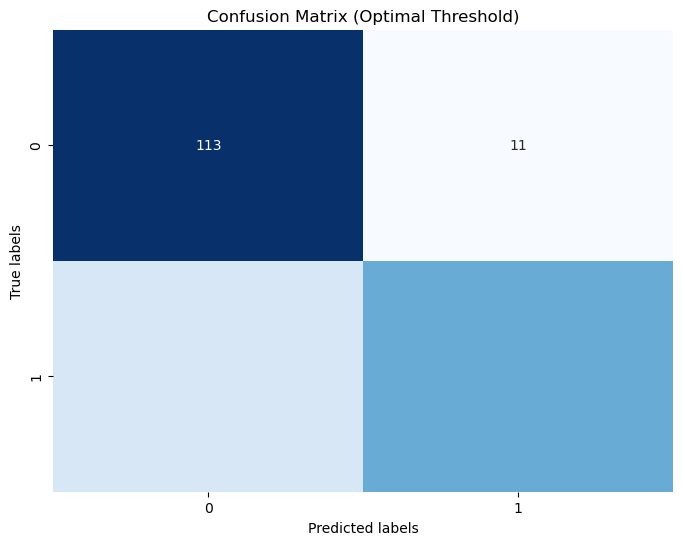

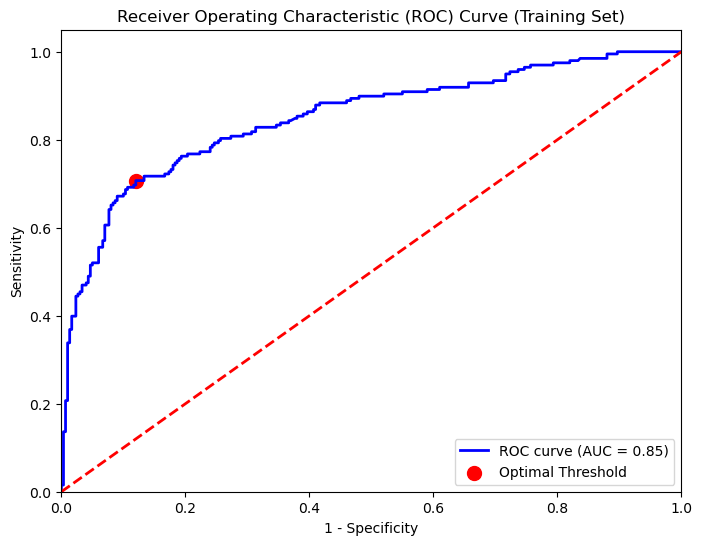

Optimal Threshold (Training Set): 0.5230826347507445


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the Logistic Regression model
logistic_reg_model = LogisticRegression(penalty = None)

# Fit the model to the training data
logistic_reg_model.fit(X_train, y_train)

# Make predictions on the training set
LoRe_pred_proba_train = logistic_reg_model.predict_proba(X_train)[:, 1]

# Make predictions on the test set
LoRe_pred_proba_test = logistic_reg_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC score on the training set
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, LoRe_pred_proba_train)
roc_auc_train = roc_auc_score(y_train, LoRe_pred_proba_train)

# Find the optimal threshold based on Youden's J statistic on the training set
optimal_threshold_idx_train = np.argmax(tpr_train - fpr_train)
optimal_threshold_train = thresholds_train[optimal_threshold_idx_train]

# Compute predictions on the test set using the optimal threshold
y_pred_optimal_test = (LoRe_pred_proba_test >= optimal_threshold_train).astype(int)

# Compute confusion matrix on the test set
conf_matrix_optimal_test = confusion_matrix(y_test, y_pred_optimal_test)

# Compute accuracy on the test set
accuracy_optimal_test = accuracy_score(y_test, y_pred_optimal_test)

# Compute classification error on the test set
classification_error_optimal_test = 1 - accuracy_optimal_test

# Compute precision on the test set
precision_optimal_test = precision_score(y_test, y_pred_optimal_test)

# Compute F1-score on the test set
f1_optimal_test = f1_score(y_test, y_pred_optimal_test)

# Print the metrics on the test set
print("Classification Error (Optimal Threshold):", classification_error_optimal_test)
print("Accuracy (Optimal Threshold):", accuracy_optimal_test)
print("Precision (Optimal Threshold):", precision_optimal_test)
print("F1-score (Optimal Threshold):", f1_optimal_test)

# Plot confusion matrix on the test set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_optimal_test, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (Optimal Threshold)')
plt.show()

# Plot ROC curve with optimal threshold on the training set
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_train)
plt.scatter(fpr_train[optimal_threshold_idx_train], tpr_train[optimal_threshold_idx_train], s=100, c='red', marker='o', label='Optimal Threshold')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('Receiver Operating Characteristic (ROC) Curve (Training Set)')
plt.legend(loc="lower right")
plt.show()

# Print the optimal threshold on the training set
print("Optimal Threshold (Training Set):", optimal_threshold_train)

d) Implement a linear discriminant analysis
- Evaluate your model with all relevant evaluation metrics
- Implement a confusion matrix and the Receiver Operating Characteristic
- Explain and Interpret all your results

Classification Error: 0.19158878504672894
Accuracy: 0.8084112149532711
Specificity: 0.8870967741935484
Precision: 0.8181818181818182
F1-score: 0.7544910179640719


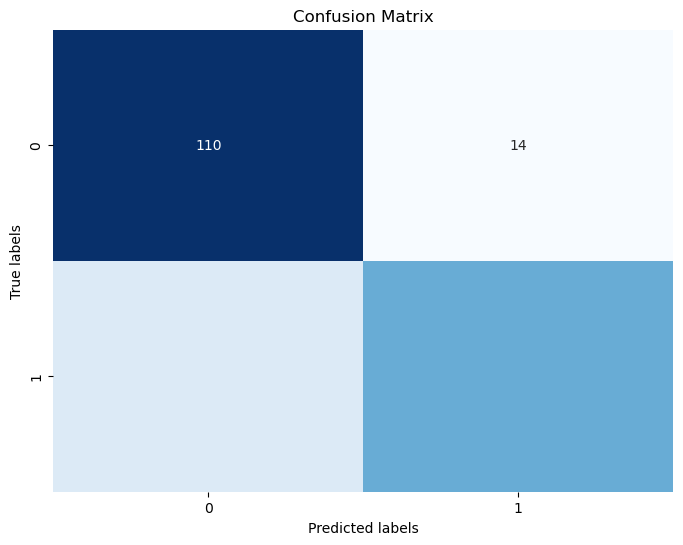

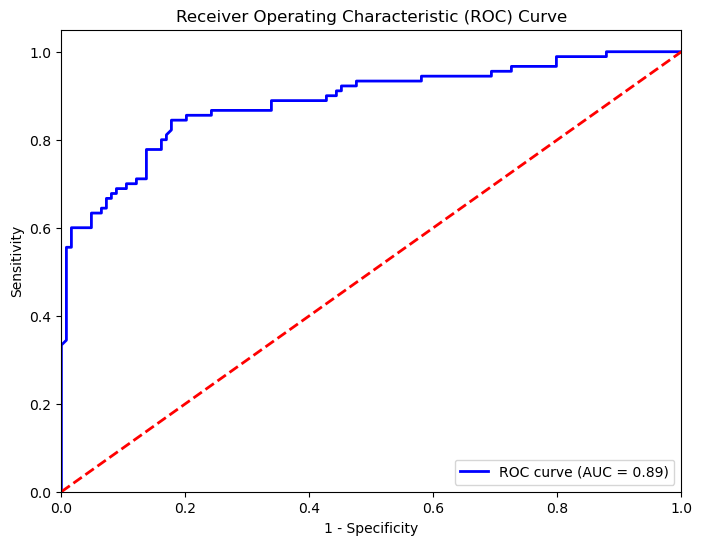

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the LDA model
lda_model = LinearDiscriminantAnalysis()

# Fit the model to the training data
lda_model.fit(X_train, y_train)

# Make predictions
LDA_pred = lda_model.predict(X_test)

# Compute confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, LDA_pred).ravel()

# Compute specificity
specificity = tn / (tn + fp)

# Compute accuracy
accuracy = accuracy_score(y_test, LDA_pred)

# Compute classification error
classification_error = 1 - accuracy

# Compute precision
precision = precision_score(y_test, LDA_pred)

# Compute F1-score
f1 = f1_score(y_test, LDA_pred)

# Print the metrics
print("Classification Error:", classification_error)
print("Accuracy:", accuracy)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1-score:", f1)

# Make predictions
LDA_pred_proba = lda_model.predict_proba(X_test)[:, 1]

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, LDA_pred)

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, LDA_pred_proba)
roc_auc = roc_auc_score(y_test, LDA_pred_proba)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

d) Implement a quadratic discriminant analysis
- Evaluate your model with all relevant evaluation metrics
- Implement a confusion matrix and the Receiver Operating Characteristic
- Explain and Interpret all your results

Classification Error: 0.21028037383177567
Accuracy: 0.7897196261682243
Specificity: 0.8548387096774194
Precision: 0.7777777777777778
F1-score: 0.7368421052631577

Mean Discriminant Score (Probability of Class 1) on Training Set: 0.35776564153620166


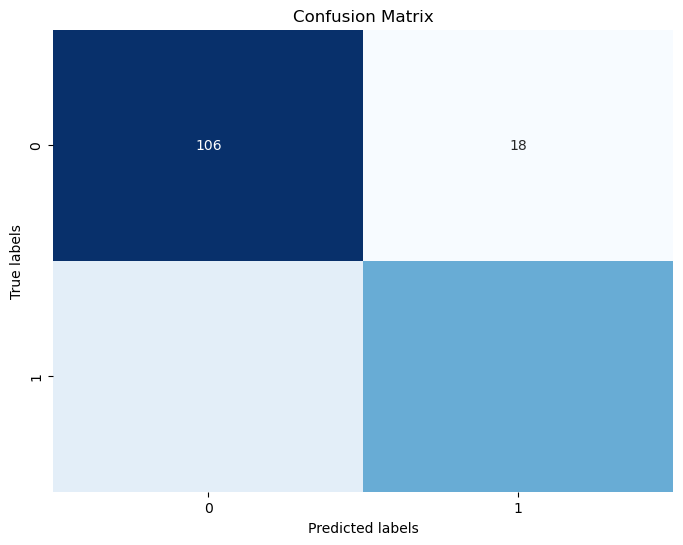

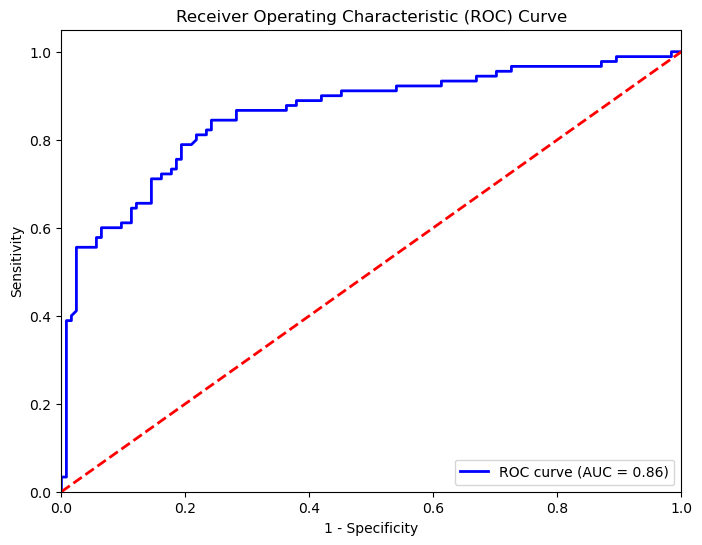

In [9]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the QDA model
qda_model = QuadraticDiscriminantAnalysis()

# Fit the model to the training data
qda_model.fit(X_train, y_train)

# Make predictions
QDA_pred = qda_model.predict(X_test)

# Compute confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, QDA_pred).ravel()

# Compute specificity
specificity = tn / (tn + fp)

# Compute accuracy
accuracy = accuracy_score(y_test, QDA_pred)

# Compute classification error
classification_error = 1 - accuracy

# Compute precision
precision = precision_score(y_test, QDA_pred)

# Compute F1-score
f1 = f1_score(y_test, QDA_pred)

# Print the metrics
print("Classification Error:", classification_error)
print("Accuracy:", accuracy)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1-score:", f1)

# Make predictions
QDA_pred_proba = qda_model.predict_proba(X_test)[:, 1]

# Compute the discriminant scores (probability of class 1) on the training set
QDA_pred_scores_train = qda_model.decision_function(X_train)

# Compute the mean discriminant score on the training set
mean_discriminant_score_train = np.mean(QDA_pred_scores_train)

# Print the mean discriminant score on the training set
print("\nMean Discriminant Score (Probability of Class 1) on Training Set:", mean_discriminant_score_train)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, QDA_pred)

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, QDA_pred_proba)
roc_auc = roc_auc_score(y_test, QDA_pred_proba)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Based on the evaluation metrics discussed, it's evident that the logistic regression outperforms both Linear and Quadratic Discriminant Analysis. This conclusion is reinforced by a plot comparing the predicted probability of survival from logistic regression against that of Quadratic Discriminant Analysis, alongside actual data points from the Titanic dataset. The Y-axis represents the output of the Quadratic Discriminant Analysis (QDA), while the X-axis represents the logistic regression. Red points denote passengers who survived the Titanic, while blue points represent those who did not. The vertical line signifies the threshold for logistic regression, separating observations classified as survivors or non-survivors. Similarly, the horizontal line represents the threshold for QDA. It's important to note that unlike logistic regression, QDA doesn't have a singular classification threshold. Here, we've used the average discriminant score, which is specific to this example and should be used cautiously with real data.


Interpreting this plot aids in evaluating which algorithm more accurately classifies the underlying data. By visually comparing the alignment of predicted probabilities with actual outcomes, we can assess which model better captures observed patterns and makes more accurate predictions. This graphical comparison provides additional insights into the relative performance of each algorithm beyond numerical metrics.

- Explain and Interpret the underlying plot!

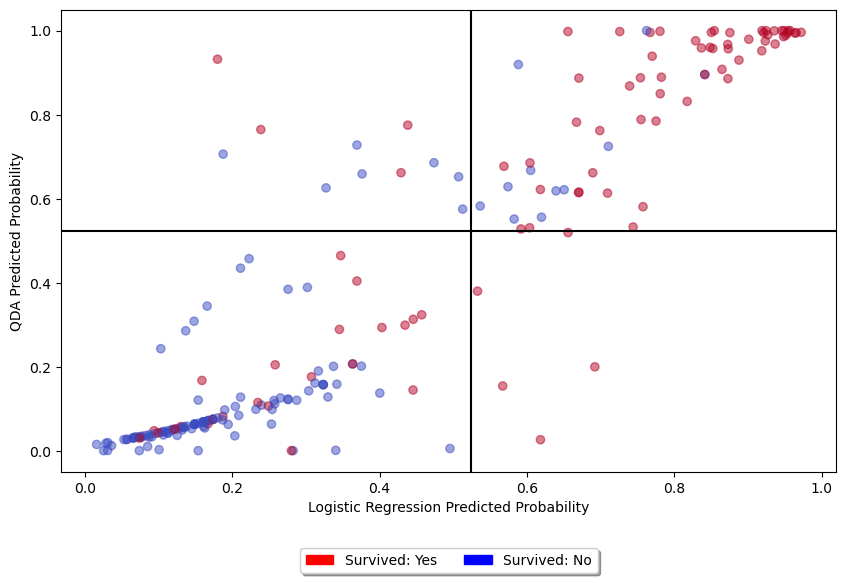

In [10]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

# Create Scatterplot
plt.figure(figsize=(10,6))
plt.scatter(LoRe_pred_proba_test, QDA_pred_proba, c=y_test, cmap='coolwarm', marker='o', alpha=0.5)
plt.xlabel('Logistic Regression Predicted Probability')
plt.ylabel('QDA Predicted Probability')
red_patch = mpatches.Patch(color = 'red', label = 'Survived: Yes')
blue_patch = mpatches.Patch(color = 'blue', label = 'Survived: No')
plt.legend(handles=[red_patch, blue_patch], loc='upper center', bbox_to_anchor = (0.5, -0.15), shadow = True, ncol = 2)

plt.axhline(y = 0.5230595473871268, color = "black", linestyle = '-')
plt.axvline(x = 0.5247872033815993, color = "black", linestyle = '-')
plt.show()